In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [17]:
df = pd.read_csv("covid_deaths_data.csv")

# Show first 5 rows
df.head()

,Date,Country,Confirmed,Deaths,Recovered,Population,Active
0,2020-01-01,India,122958,7465,8061,1380000000,107432
1,2020-01-02,India,147867,4024,82652,1380000000,61191
2,2020-01-03,India,132932,1696,125536,1380000000,5700
3,2020-01-04,India,366838,3019,386693,1380000000,-22874
4,2020-01-05,India,260178,7816,27234,1380000000,225128


In [18]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
df.info()


Dataset contains 500 rows and 7 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        500 non-null    object
 1   Country     500 non-null    object
 2   Confirmed   500 non-null    int64 
 3   Deaths      500 non-null    int64 
 4   Recovered   500 non-null    int64 
 5   Population  500 non-null    int64 
 6   Active      500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [19]:
df.describe()


,Confirmed,Deaths,Recovered,Population,Active
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000
mean,253379.450000,5104.948000,199198.070000,4.276000e+08,49076.43200
std,143759.670802,2749.029599,119549.147385,4.844395e+08,194906.01065
min,3693.000000,14.000000,626.000000,6.800000e+07,-384352.00000
25%,128375.250000,2848.750000,94604.250000,1.460000e+08,-92778.75000
50%,253755.000000,5192.500000,192830.000000,2.130000e+08,42912.50000
75%,378949.000000,7287.500000,306128.250000,3.310000e+08,195437.00000
max,497257.000000,9959.000000,397734.000000,1.380000e+09,468794.00000


In [20]:
df.isnull().sum()


Date          0
Country       0
Confirmed     0
Deaths        0
Recovered     0
Population    0
Active        0
dtype: int64

In [21]:
df.nunique()


Date          100
Country         5
Confirmed     500
Deaths        480
Recovered     500
Population      5
Active        500
dtype: int64

In [22]:
correlation = df.select_dtypes(include='number').corr()
correlation


,Confirmed,Deaths,Recovered,Population,Active
Confirmed,1.000000,-0.049772,-0.086535,-0.001210,0.791364
Deaths,-0.049772,1.000000,0.012458,-0.018040,-0.058457
Recovered,-0.086535,0.012458,1.000000,-0.007544,-0.677370
Population,-0.001210,-0.018040,-0.007544,1.000000,0.003989
Active,0.791364,-0.058457,-0.677370,0.003989,1.000000


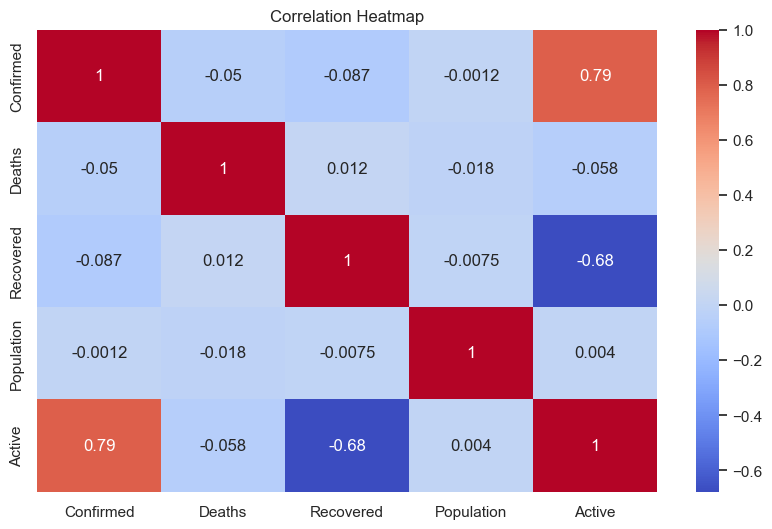

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


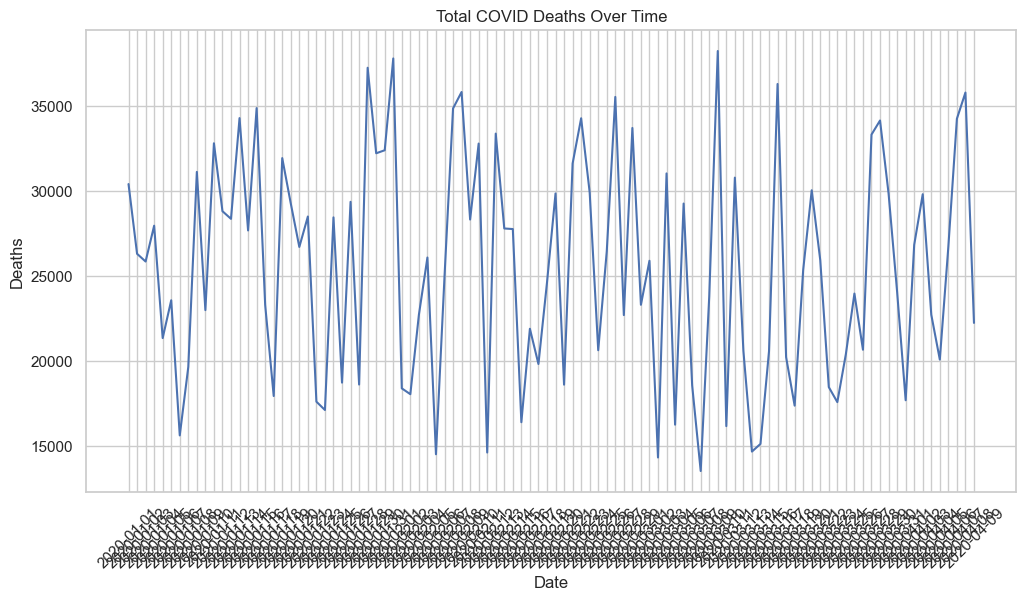

In [24]:
total_deaths = df.groupby('Date')['Deaths'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Deaths', data=total_deaths)
plt.title("Total COVID Deaths Over Time")
plt.xticks(rotation=45)
plt.show()


C:\Users\deepa\AppData\Local\Temp\ipykernel_19136\3583444663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_deaths.index, y=country_deaths.values, palette="Reds")


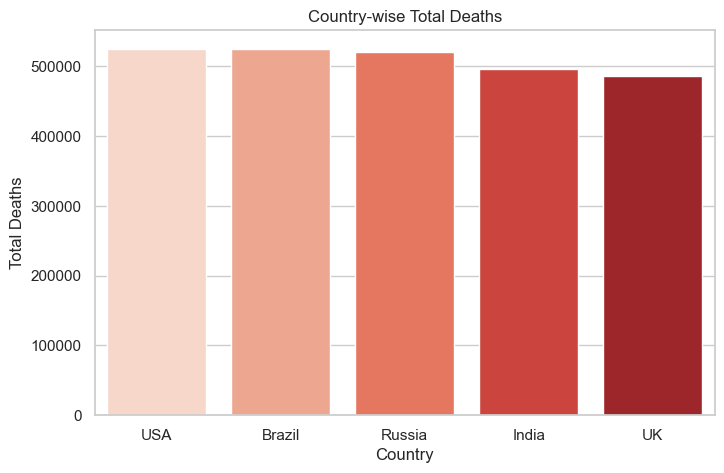

In [25]:
country_deaths = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=country_deaths.index, y=country_deaths.values, palette="Reds")
plt.title("Country-wise Total Deaths")
plt.ylabel("Total Deaths")
plt.show()


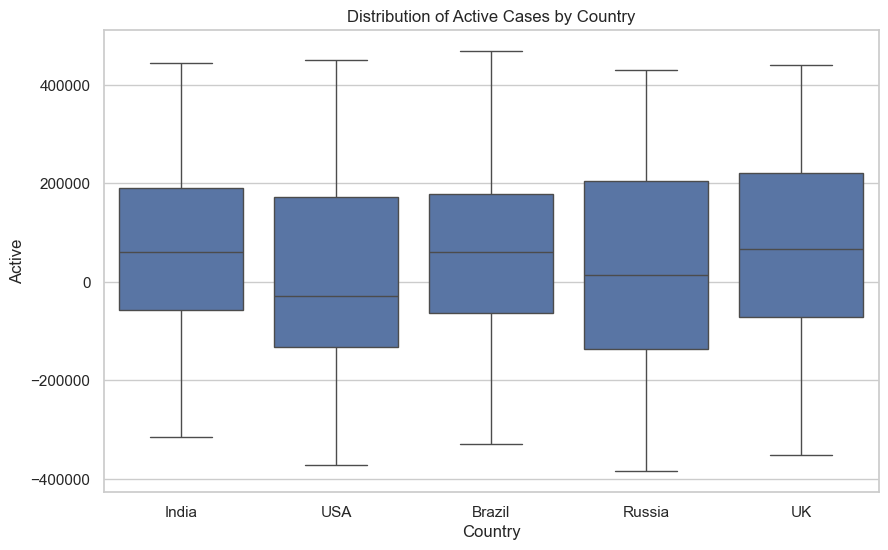

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Active', data=df)
plt.title("Distribution of Active Cases by Country")
plt.show()


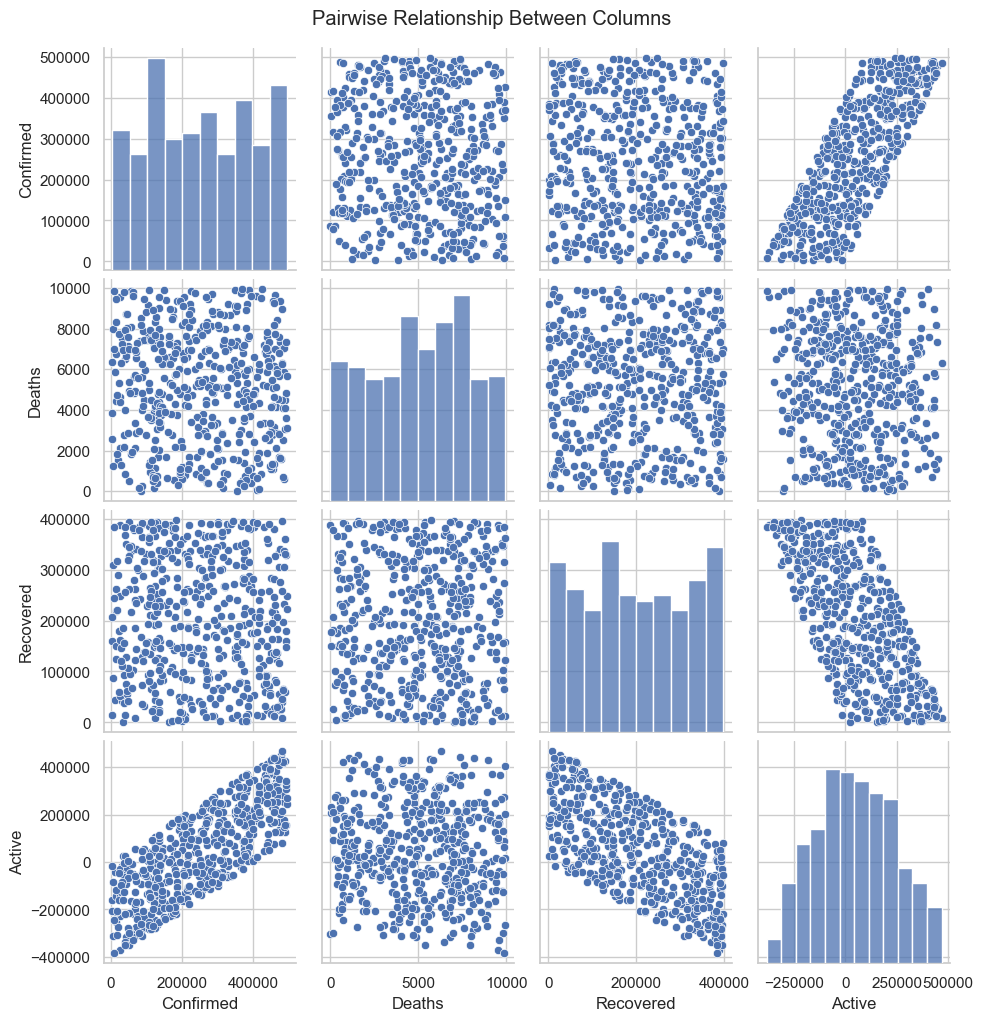

In [27]:
sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.suptitle("Pairwise Relationship Between Columns", y=1.02)
plt.show()


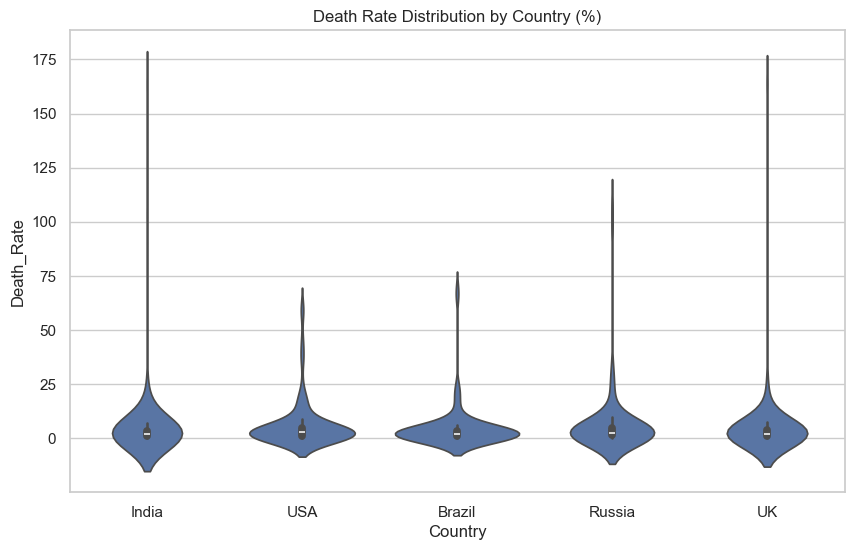

In [28]:
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']) * 100

plt.figure(figsize=(10,6))
sns.violinplot(x='Country', y='Death_Rate', data=df)
plt.title("Death Rate Distribution by Country (%)")
plt.show()
